<a href="https://colab.research.google.com/github/MYikuno/Fundamentals-of-DL/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##import libraries

import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

**Load and visualise data**

In [2]:
##read data
diabetes_data = pd.read_csv('/content/drive/MyDrive/diabetes (1).csv')

##display the first five rows
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
##text summary
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


As we can see from the text summary displayed above, there are no missing values in our dataset.

**Feature visualisation**

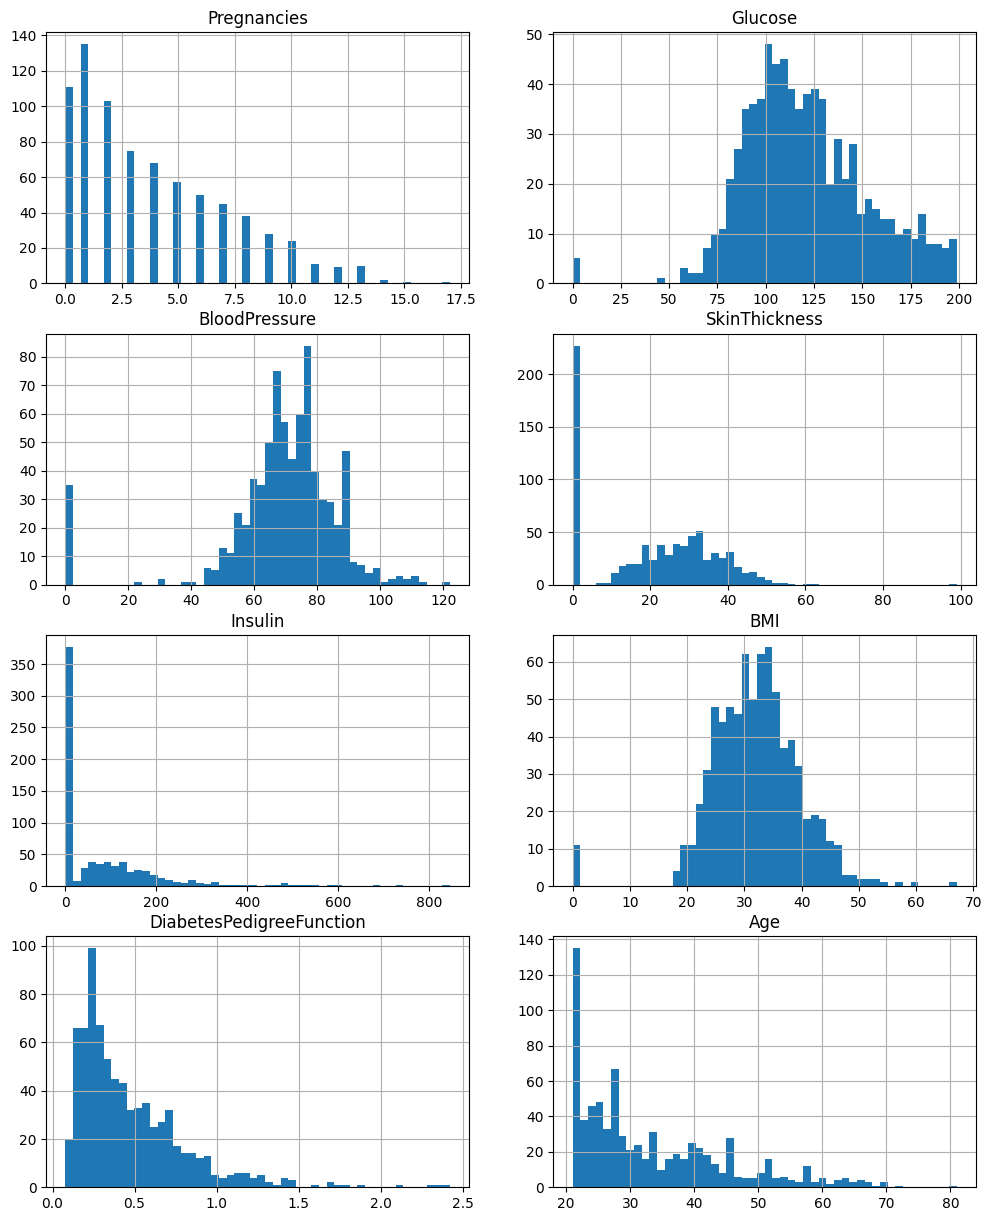

In [4]:
##extract features
rows, cols = diabetes_data.shape
X = diabetes_data.iloc[:,:cols-1]

fig, axs = plt.subplots(4, 2, figsize = (12, 15))

for i in range(4):
  for j in range(2):
    col = i * 2 + j
    axs[i, j].hist(X.iloc[:, col], bins=50)
    axs[i, j].set_title(X.columns[col])
    axs[i, j].grid(True)

plt.show()


The histogram visualization given above shows that some features have normal distributions but some do not have normal distribution which we will further preprocess it to make the data ready for fitting a machine learning model into it.

**Data pre-processing**

Here, we split our data set into training, validation and testing sets. We will use the training and validation sets to train and optimise our model and the testing set to evaluate our final model. After spliting, we did standard scalling on our data to have dataset with approximately standard normal distribution (mean 0 and std 1).

In [5]:
##features
X_full = diabetes_data.drop('Outcome', axis = 1)

##label
y_full = diabetes_data['Outcome']

##Data splitting 70/20/10
##training/val/test split
##put test set aside
X, X_test, y, y_test = train_test_split(X_full, y_full, test_size = 0.1, stratify = y_full, random_state=42)

##split into train and val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)

##standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

print(X_val.shape)
print(y_val.shape)

(139, 8)
(139,)


In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(552, 8)
(139, 8)
(77, 8)


**Model Building and selection**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

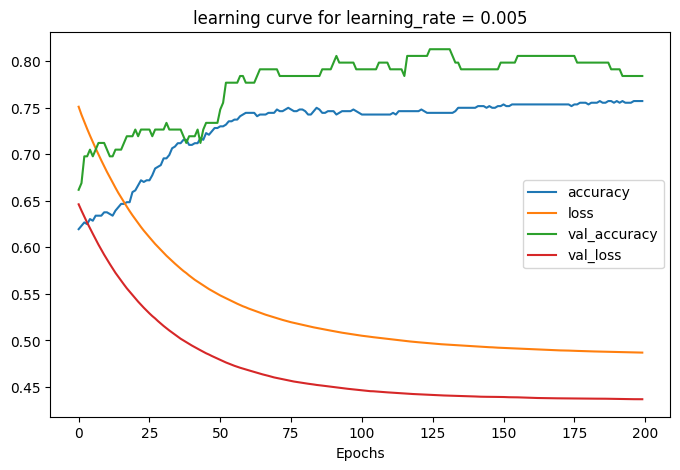

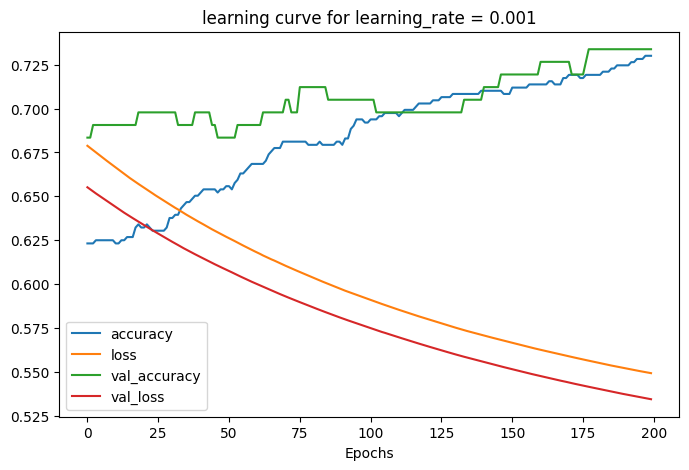

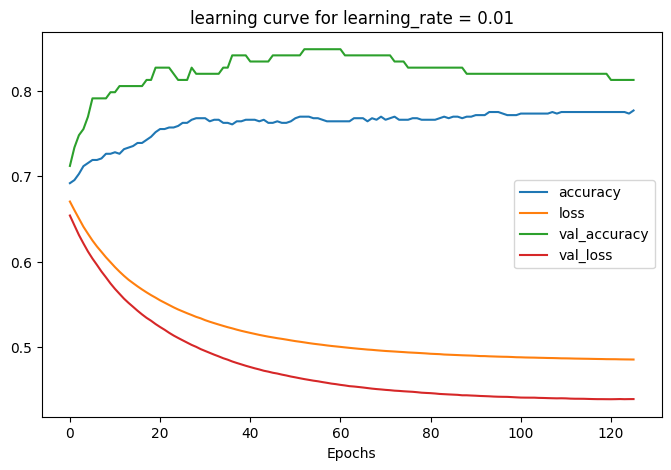

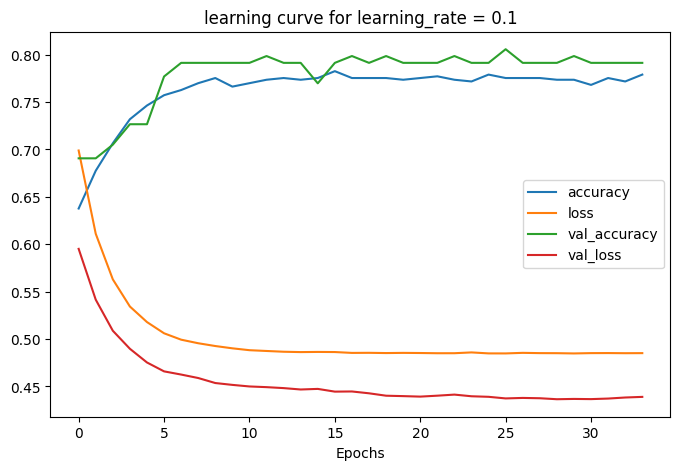

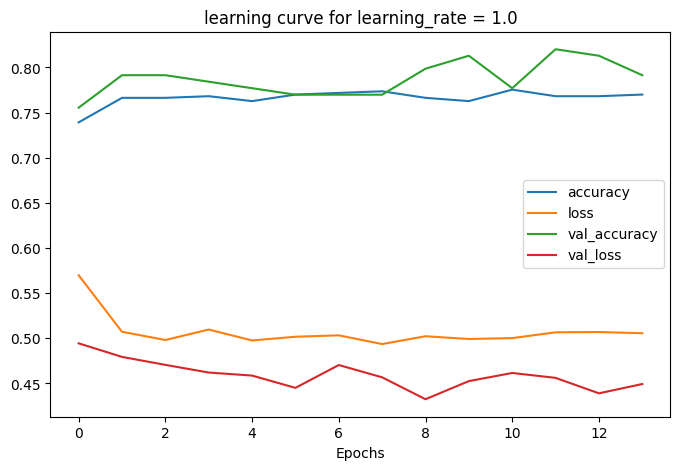

In [6]:
#Setting Model Parameters

##learning rate
learning_rate = [0.005, 0.001, 0.01, 0.1, 1.0]
lr_results = []

def model_fct(lr):
  ##optimizer
  opt = keras.optimizers.SGD(learning_rate=lr)

  model = Sequential()
  model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

  ##model summary
  ##model.summary()

  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  # Early stopping callback
  early_stop = EarlyStopping(monitor='val_loss', patience=5)
  ##start_time = time.time()
  # Model training
  history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=0)
  ##end_time = time.time()

  ##maximum validation acc
  mean_val_acc = np.mean(history.history['val_accuracy'])

  return (history, mean_val_acc, model)

for lr in learning_rate:
  history, mean_val_acc, model = model_fct(lr)

  ##plot learning curve
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.title(f'learning curve for learning_rate = {lr}')
  plt.xlabel('Epochs')

  ##append max_val_acc
  lr_results.append((lr, mean_val_acc))



In [7]:
##max_val_acc for different learning rates
##list of (lr, max_val_acc)
print("mean val acc:\n", lr_results)

mean val acc:
 [(0.005, 0.774856119453907), (0.001, 0.7060071894526482), (0.01, 0.822427774705584), (0.1, 0.7795175804811365), (1.0, 0.7872559172766549)]


**Model Evaluation**

From the model selection step, we selected the perceptron model with learning rate lr = 0.01 which is the one with better convergence which we can see it from its learning curve and almost similar validation accuracy to the other models. And here, we trained the selected model with our full training dataset (training + validation data) and evaluate it using our testing set that we put aside at the begining of our data splitting step. We used different evaluation metrics such as accuracy, f1-score and roc_auc_score.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Axes: >

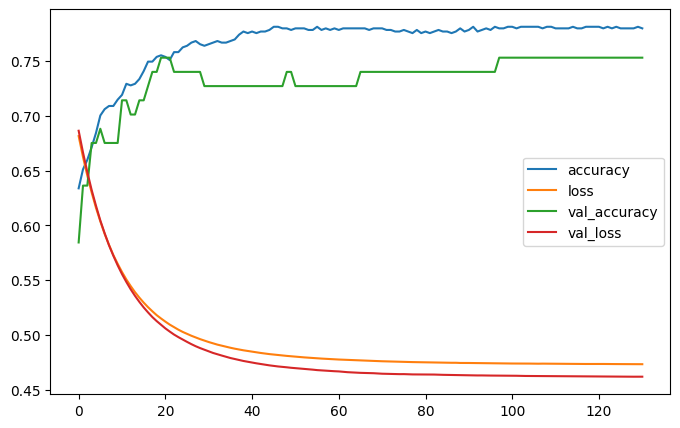

In [8]:
##full training data
##train + val
X_train = X
y_train = y

##standard scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

##selected lr
lr = 0.01

##optimizer
opt = keras.optimizers.SGD(learning_rate=lr)

final_model = Sequential()
final_model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

final_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

## Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5)


## Model training
history = final_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)

##plot learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy:  0.7662337662337663
F1_Score:  0.6538461538461539
Roc_auc:  0.7438461538461539
precision:  0.6296296296296297
Recall:  0.68


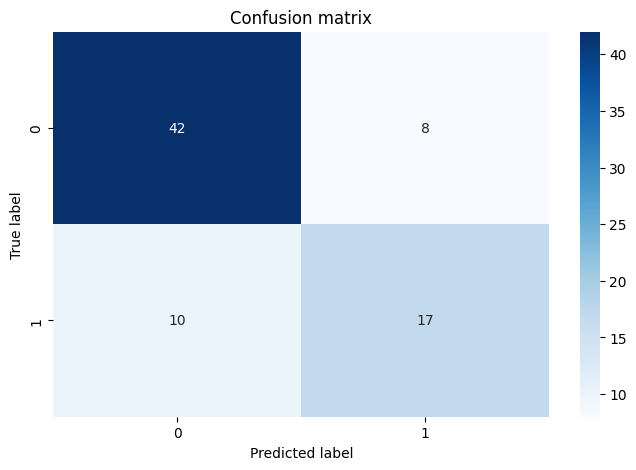

In [9]:
##model evaluation

##prediction on test data
pred = model.predict(X_test)
y_pred = (pred>=0.5).astype(int)

print("Accuracy: ", accuracy_score(y_pred, y_test))
print("F1_Score: ", f1_score(y_pred, y_test))
print("Roc_auc: ", roc_auc_score(y_pred, y_test))
print("precision: ", precision_score(y_pred, y_test))
print("Recall: ", recall_score(y_pred, y_test))

##confusion matrix
cm = confusion_matrix(y_test, y_pred)

##visualise the cm
plt.figure(figsize=(8,5))

sns.heatmap(cm ,annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()